In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

# These defaults are the ones I like, but feel free to adapt or delete them
sns.set_style('white')
sns.set_context('talk')


# Bayesian Statistics: the what, the why, and the how
This notebook contains illustration material for a workshop about Bayesian statistics. It is not meant to be a complete set of documentation about everything that is discussed. It should, however, be sufficient to follow the whole story, without hearing the author speak. There is, therefore, slightly more text than one generally wants to display on a projector screen, but alas.

The workshop is meant to give a conceptual introduction to the topic of Bayesian statistics. Sometimes, some mathematical "rigor" is helpful to understand the concept. I will use it for that purpose only. The focus will instead be on what it means, and how one can use Bayesian statistics from a Pythonic point of view. Along this notebook with instruction material, there is a notebook with exercises that you are free to explore or ignore. There is also a solutions notebook that has a (at points somehwat thin bodied) guide to what the exercises meant to result in. Often, there is no "right or wrong", but qualitatively your solution should correspond to the one in that notebook. At points, stuff is left out of this instruction notebook, and you will actually learn new things from the exercises. Most of the time, however, the instructor will have you make some exercises and discuss the results later from this notebook. It is, therefore, not advised to scroll down much further in the notebook than what you see on the screen.

I did not want or need to reinvent any wheels, so much of this material is adapted from material from the web. Wherever applicable, I have referenced the source. Like the material used, this notebook (as well as the corresponding exercises and solution notebooks) are BSD licensed, so free to use and distribute.

Without any further ado, let's dive into the material. As if it should surprise anybody, the one equation all of Bayesian statistics revolves around is Bayes' theorem:

<img src="figures/Bayes_Theorem.jpg" alt="Bayes theorem">

This equation is trivially derived from conditional probabilities and is not subject to any criticism from the "frequentist" camp, which is what "conventional" statistics is often called in this context. The difference will become clear in throughout this workshop. The probability that both $A$ and $B$ happen is denoted $P(A \wedge B)$ is given by two symmetric conditional probabilities, namely the probability that $A$ happens given that $B$ already happened ($P(A \,|\, B)$), times the probability that $B$ happens and vice versa:
$$ P (A \wedge B) = P(A \,| \,B) P(B) = P(B\,|\,A) P(A)$$

In the discussion of frequentist versus Bayesian statistics, the interpretation of probabilities is often the crux of (often philosophical) disagreement. Bayes' theorem itself is not subject of discussion. It is a basic result from probability theory, but has fairly drastic consequences for the interpretation of statistical results. Neither ferquentism nor bayesianism is wrong, but they answer fundamentally different questions. **Far too often** bayesian questions are answered with a frequentist method. From today onwards, you do not need to make such mistakes any longer!

As will hopefully become clear from the examples, the main benefits of bayesian methods are:
- That it is much easier, and in fact trivial, to include prior knowledge about the subject of study
- That uninteresting, but important quantities to derive quantities of interest are included in a much more natural way.

## Testing positively to a serious disease

As an example of the use of Bayes' theorem, let's assume the following situation. There is a fairly rare disease, from which about 1 in a 1000 people suffer. You tested positively to this disease in a test that correctly identifies 99% of infected people. It is also 99% accurate for healthy people. What is the chance that you do indeed have the disease?


Let's fill out Bayes' theorem:
$$ P(\textrm{ill } | \textrm{ positive}) = \frac{P(\textrm{positive } | \textrm{ ill}) \cdot P(\textrm{ill}) }{ P(\textrm{positive}) } $$
in which the denominator is given by the sum of testing positive while ill times the chance you are ill and the chance of testing positive while not ill times the chance not being ill:
$$ P(\textrm{positive}) = P(\textrm{positive } | \textrm{ ill}) \cdot P(\textrm{ill}) +  P(\textrm{positive } | -\textrm{ill}) \cdot P(-\textrm{ill}) $$ 

And given that this is a Python notebook, let's just solve this with "code":

In [2]:
P_positive_if_ill = .99
P_positive_if_notill = .01
P_ill = 1.e-3
P_notill = 1 - P_ill







print("P_ill_if_positive = ", 
      P_positive_if_ill * P_ill / (P_positive_if_ill * P_ill + P_positive_if_notill * P_notill ))

P_ill_if_positive =  0.09016393442622951


Is that counter-intuitive? Not really... The false positive rate is actually fairly high, and with the numbers as given, the chance is about ten times higher that you are a false positive than that you are a real positive: of all 999 people in a thousand that are not ill, 10 (or, rather, 9.99) will be tested positive!


Exercise 1 in the exercise notebook lets you play with the numbers if you don't want to change them in this notebook.


Now this you could have easily calculated without Bayes' theorem. One needs to think of the false positives though, something that is hard to forget when filling out Bayes' theorem. Now what if you would do a second test, exactly like the first, but independent? How can you incorporate the knowledge from the first test and update the probability of being ill, given the second positive result, after you already know the probability resulting from the first test?

Simple, plug in the result from the first go as the probability that you are ill:

In [3]:
P_positive_if_ill = .99
P_positive_if_notill = .01
P_ill = 0.09016
P_notill = 1 - P_ill







print("P_ill_if_positive = ", 
      P_positive_if_ill * P_ill / (P_positive_if_ill * P_ill + P_positive_if_notill * P_notill ))

P_ill_if_positive =  0.9074959738421747


This is what bayesiansism is all about: **The new (posterior) probability about a phenomenon is determined by what you already knew (the prior probability), updated with new data.**

In exercise 2 you can play around with updating knowledge.



--------------------------------------------------------------------------------------





# Frequentism vs. Bayesianism - philosophy
Text here, as well as examples, are largely taken and adapted from a [blog by Jake VanderPlas of the eScience Institute at the University of Washington](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) (blog made in Jupyter notebook). There is a [paper]( http://arxiv.org/abs/1411.5018) that belongs to this blog post.

- For frequentists, probability only has meaning in terms of a limiting case of repeated measurements; probabilities are fundamentally related to frequencies of events.
- For Bayesians, the concept of probability is extended to cover degrees of certainty about statements; probabilities are fundamentally related to our own knowledge about an event.

## Some terminology
In Bayes' theorem, right of the equality sign there are the likelihood, the prior (what do you know on beforehand about the quantity you're interested in, _this_ is one of the main reasons for criticism and discussion) and the data probablility (also called evidence, which is often used merely as a normalization factor, which we will justify below). The left side of the equation is our quantity of interest, the posterior: what do you know about the quantity of interest after you updated prior knowledge with new data?


## The flux of photons from a star
In this example we are interested in measuring the flux of photons from a star, that we assume to be constant in time. We measure the flux some number of times with some uncertainty (for simplicity we take the approximation that the error on the number of photons meaured is equal to the square root of the measured number, which is a reasonable approximation for large numbers):

In [4]:
# A random seed, for reproducibilty.
np.random.seed(42)  

F_true = 1000  # True value that we will try to recover
N = 50 # Number of measurements
F = stats.poisson(F_true).rvs(N)  # N measurments of a Poisson distributed F
e = np.sqrt(F)  # Poisson errors

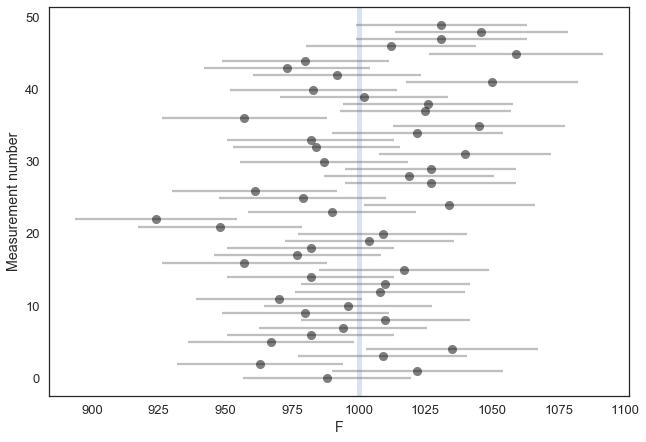

In [5]:
fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.axvline(x=F_true, linewidth=5, alpha=0.2)
ax.set_xlabel("F");ax.set_ylabel("Measurement number");

The question now is: given these measurements, what is the best guess for the real flux, F?

Let's call all measurements $F_i$ with error $e_i$ combined a data point $D_i = \{F_i, e_i \}$.


## The frequentist method: maximum likelihood

Given the assumed Gaussian distributed errors, one can determine the likelhood by taking all measurements together. The probability of a given data point $i$, given $F_{true}$ is nothing else than the Gaussian PDF:
$$ P(D_i | F_{true}) = \frac1{\sqrt{2 \pi e_i^2}} \exp \Big( \frac{-(F_i - F_t)^2}{2e_i^2} \Big) $$

This doesn't help much by itself, because you do not know $F_{t}$. Therefore, one constructs the likelihood, which is the product of all $ P(D_i | F_{true})$, maximize that and isolate $F_t$:


$$ \mathcal{L} (D | F_t) = \prod_i  P(D_i | F_{true}) \Leftrightarrow \log  \mathcal{L} (D | F_t) = -\frac1{2} \sum_{i=1}^N \Big( \log(2 \pi e_i^2) + \frac{(F_i - F_t)^2}{e_i^2} \Big)$$

After taking the logarithm, the maximum does not change ($\textrm{d} \log \mathcal{L} / \textrm{d} F_t = 0$).

The result is that the best estimate for the flux is nothing else than a weighted average of all data points:

$$ F_{\textrm{est}} = \frac{\sum w_i F_i}{\sum w_i}$$

in which $w_i = 1/e_i^2$. With all errors being equal, $ F_{\textrm est}$ is the mean of the measurements. The standard error of the estimate of $F_t$ is given by

$$ \sigma_{\textrm{est}} = \Big( \sum_{i=1}^{N} w_i\Big)^{-1/2}$$

Simple! Let's fill out the measurements of our star and see how well we do:

In [6]:
w = 1. / e ** 2
print("""
      F_t = {0}
      F_est  = {1:.0f} +/- {2:.0f} (gebaseerd op {3} metingen)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


      F_t = 1000
      F_est  = 999 +/- 4 (gebaseerd op 50 metingen)
      


## The Bayesian way

Bayes would say that it makes little sense tot talk about the probability of data, given the true flux, but that it rather should be the other way around: the data is given and you should be interested in the probability of your estimate. Therefore, we would like to obtain

$$ P (F_t | D) = \frac{P(D | F_t) P(F_t)}{ P(D)} $$

On the right hand side of the equation we recognize the prior, $P(F_t)$, about which we might know nothing yet. In that case it is good practice to use a so-called uninformative prior; a prior that does not favor some outcomes in the posterior over others. Often this is called a "flat prior", but not in all situations is the functional form of an uninformative prior really flat. In the simple example here it is, though (and in case of scalar probablities for a stochastic variable rather than probability density functions it would be 1).

Aside from the denominator we see that a flat prior results in a posterior that is equivalent to the likelihood function that is used in the frequentist approach. In a simple toy problem like the one of the star's constant flux, both methods are bound to give the exact same answer. Nevertheless, we will use this toy example to illustrate the way in which a Bayesian would go about this problem. This will show useful in more difficult examples where the frequentist approach is less trivial.

Our goal is to determine $P (F_t | D)$ as a function of the model parameter $F_t$. Our knowledge of that model parameter is encoded in the posterior distribution function: it resembles what we already knew (nothing), updated with our new data (via the likelihood function). This posterior is a nice one-dimensional PDF, that will turn out to have a very nice unimodal shape. In genereal this thing may be messy, multimodal, multi-dimensional and very hard to parametrize. 

It is mostly the multi-dimensionality that requires a careful sampling of the posterior distribution function, before inferences about model parameters can be made. In the example of our flux measurements we want to sample the posterior, which we don't know a priori, so instead we:
- take guesses for the model parameters,
- evaluate the prior and likelihood for those guesses of model parameters (given the data)
- obtain a value for the posterior (evidence doesn't depend on model parameters)
- try to improve on that in a next iteration.

Those iterations are typically done with Markov Chain Monte Carlo simulations. Monte Carlo is a typical random iteration process, and the Markov Chain bit indicates that iterations are not independent of the previous iterations, like they would be in classical Monte Carlo.

These samplers work as follows. Many different algorithms for building up the Markov Chains exist, but most are fairly similar in general. Given a random initialisation of the guess for the model parameters (or better: sampled from the prior PDF), the first value of the posterior PDF is calculated. See "Iteration 1" in the figure below. From that, a jump is taken to another place in parameter space. This will give a new value for prior and likelihood, and thus for posterior. Based on a comparison of the old and the new value the jump is accepted or not. It will be accepted:
- if the new posterior pdf has a higher value for the new parameters: $P_{i+1} > P_i$
- with a probability $P_{i+1} / P_i$ if $P_{i+1} < P_i$

<img src="figures/walkers_early.png" alt="Metropolis algoritme">


Different choices can be made in accepting the jump or not, and this what defines some of the sampling algorithms. Note that this is also why for the chain, the evidence term doesn't matter. That it is possible to also accept jumps with lower posterior probability density ensures that the chains walk to a local maximum and then swarm around it, thus sampling the full high posterior probability region well. In fact, the density of sampled points is supposed to be directly proportional the probability density.

Two independent walkers will result in two chains, which after sampling the posterior to a fair extent may look like:

<img src="figures/walkers.png" alt="Markov chain">

As you can see, the first few steps are necessary to get in the vicinity of the maximum of the posterior, and these steps in the realm of low posterior PDF are often called "burn in", and these steps can be taken out later, based on the evolution of the posterior probability density. 

There is a non-zero probability that a Markov Chain jumps from one local maximum to another. This probability is pretty low though, so evolving one Markov chain further is generally not a wise method to find all local maxima, if there are several. A better idea is to use several walkers that sample the allowed space well. In practice, for an uninformative prior, this may be hard to determine, so experimentation is advised. For a fairly well determined prior, make sure to sample the whole prior space well and evolve from there. It may even be wise to force a bunch of walkers to start from very low prior probability, especially if the likelihood and prior probability seem to be in tension.



## Examples of action, using the emcee package

A light-weight package, that can still do much of the heavy lifting, is brought to you by a team of mostly astronomers:

<img src="figures/emcee.JPG" alt="emcee">

The ADS listing is [here](http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2013PASP..125..306F&db_key=AST&link_type=ABSTRACT&high=58bf03a4f924347).
It implements an affine-invariant ensemble sampler for Markov chain Monte Carlo and has a very intuitive Python API. Many choices are made for you, which has the advantage that it is easy to use (and requires very little hand-tuning), but the disavantage that you cannot play with these choices. Below we will mention some other packages with more freedom (which are, by the law of conservation of misery, more difficult to use).

What the package needs from us is a functional form of the posterior. To keep things in line with what we have already seen, and given that we know how it depends on prior and likelihood, it is insightful to define the latter two explicitly and then pass the posterior as a combination of them. Because numbers tend to get small, and because additions are easier then multiplications, it is common practice to pass around the logarithm of the distribution functions instead. In fact, emcee expects us to do so.

The prior should be a function of the (vector of) model parameters, called theta, and the likelihood should be a function of the model parameters vector, the data vector and the vector of corresponding errors (F and e below). 

For the example of the stellar flux, with a flat prior and a Gaussian likelihood, this looks like:

In [7]:
def log_prior(theta):
    return 1  # flat prior

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

In order to call emcee, we will have to define a few parameters in order to tell emcee how to do the sampling:

In [8]:
# The dimensionality of the problem, or: how many parameters do I want to infer? 
# This is the length of the theta vector.
ndim = 1
# The number of independent walkers, i.e. Markov Chains, you want to construct
nwalkers = 50
# The number of steps you want the walkers to take along one chain (this is the number of accepted steps)
nsteps = 2000

# Pick starting guesses for all values in the vector of model parameters, for all walkers.
# Here we take them random between zero and 2000.
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

# Import the package! This will typically be done on top of the notebook.
import emcee
# This necessary first step only initializes a session, where the full set of parameters is given
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
# The object now has a method to actually run the MCMC sampler, from the starting points for nsteps steps
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # Result after run_mcmc; shape = (nwalkers, nsteps, ndim)

# The number of burn-in points has to be set by hand (you don't actually need to do this), 
# how to pick the number is an exercise later today.
nburn = 1000

sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

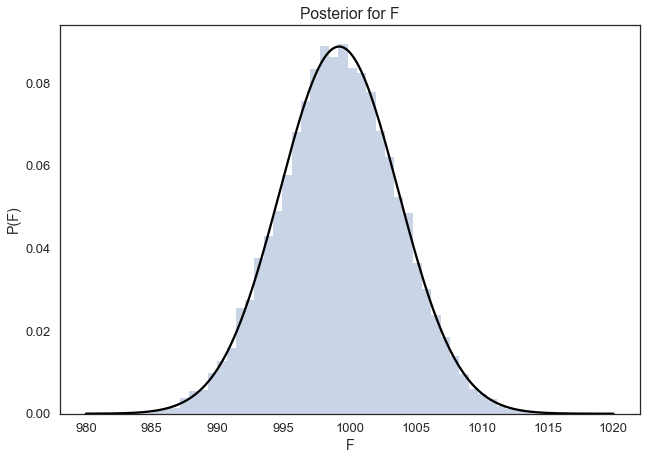

In [9]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, normed=True)

# plot a "best-fit Gaussian"
F_fit = np.linspace(980, 1020, num=500)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); plt.ylabel("P(F)")
plt.title('Posterior for F');


In [10]:
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, np.mean(sample), np.std(sample), N))


      F_true = 1000
      F_est  = 999 +/- 4 (based on 50 measurements)
      


# A somewhat more complicated problem

Let us do something very similar to the example of the stellar flux, but now sampling values from a distribution that itself is Gaussian, with a fixed mean and given standard deviation. The "measurement error" on the flux is still given by the square root of the actually measured value.

Below I will plot the example, and what we are after is a best guess for the real average flux and the standard deviation of that flux distribution (both with some confidence intervals around them, preferably). Note that we are still dealing with nice gaussian distributions to keep things simple.


In [11]:
np.random.seed(42)  
N = 100  
mu_true, sigma_true = 1000, 10  # True flux at time of measurement is distributed following a gaussian.

F_true = stats.norm(mu_true, sigma_true).rvs(N)  # Onbekende werkelijke aantallen, nu met scatter
F = stats.poisson(F_true).rvs()  # Waargenomen aantallen, met errors
e = np.sqrt(F)  # root-N error

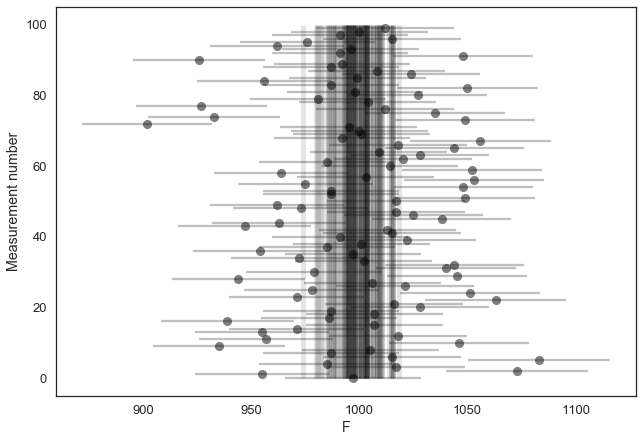

In [12]:
fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.1)
ax.set_xlabel("F");ax.set_ylabel("Measurement number");

# Good-old frequentist methods

Like before, maximizing the likelihood should give us the best guess for the parameters we are after. The vector theta of model parameters now has two unknowns. The likelihood is now a convolution between the intrinsic distribution for F and the error distribution, like we saw before. This can be expressed as:


$$\mathcal{L}(D~|~\theta) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi(\sigma^2 + e_i^2)}}\exp\left[\frac{-(F_i - \mu)^2}{2(\sigma^2 + e_i^2)}\right]$$

So for the best guess we can now write:

$$\mu_{est} =  \frac{\sum w_i F_i}{\sum w_i};\, \textrm{where}\, w_i = \frac{1}{\sigma^2+e_i^2} $$

And here we run into a problem! The best value for $\mu$ depends on the best value for $\sigma$! Luckily, we can numerically find the solution to this problem, by using the optimization functions in scipy:


In [13]:
def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * (theta[1] ** 2 + e ** 2))
                         + (F - theta[0]) ** 2 / (theta[1] ** 2 + e ** 2))

# maximize likelihood <--> minimize negative likelihood
def neg_log_likelihood(theta, F, e):
    return -log_likelihood(theta, F, e)

from scipy import optimize
theta_guess = [900, 50]    # You will have to start your optimzation somewhere...
theta_est = optimize.fmin(neg_log_likelihood, theta_guess, args=(F, e))   # Black box?
print("""
      Maximum likelihood estimate for {0} data points:
          mu={theta[0]:.0f}, sigma={theta[1]:.0f}
      """.format(N, theta=theta_est))

Optimization terminated successfully.
         Current function value: 497.622547
         Iterations: 67
         Function evaluations: 130

      Maximum likelihood estimate for 100 data points:
          mu=1000, sigma=15
      


## Bootstrap methods to estimate uncertainties

The frequentist method results in an estimate for the mean of the gaussian that describes the variation of the true mean flux and the standard deviation of that gaussian. Note that this standard deviation is *not* the error on the mean! So how can a frequentist find out how well determined the mean and standard deviation are?

One (of many) option(s) is to do a bootstrap of the results. I do not want to go into too much detail, because we better spend our time on more natural bayesian methods, but I will quickly show what the frequentist would (or should) do in this case. A bootstrap is a method that does not assume anything about the underlying data (so normality is not an issue) and does in principle always work. How it works is as follows: for many random subsamples of the data you determine the likelihood as well and you investigate the distribution of means and standard deviations of all of those resulting likelihoods. 

There is quite a lot of literature about the ins and outs of bootstrap resampling, that is beyond the scope of this workshop, but I do want to advice you to have a careful looka th this before applying it blindly. I will apply it blindly here though:

In [14]:
from astroML.resample import bootstrap

def fit_samples(sample):
    # sample is an array of size [n_bootstraps, n_samples]
    # compute the maximum likelihood for each bootstrap.
    return np.array([optimize.fmin(neg_log_likelihood, theta_guess,
                                   args=(F, np.sqrt(F)), disp=0)
                     for F in sample])

samples = bootstrap(F, 1000, fit_samples)  # 1000 bootstrap resamplings

In [15]:
mu_samp = samples[:, 0]
sig_samp = abs(samples[:, 1])

print(" mu    = {0:.0f} +/- {1:.0f}".format(mu_samp.mean(), mu_samp.std()))
print(" sigma = {0:.0f} +/- {1:.0f}".format(sig_samp.mean(), sig_samp.std()))

 mu    = 1000 +/- 3
 sigma = 14 +/- 6


We can see that even though the original estimate of the true standard deviation was pretty far off, the bootstrap resampling shows that the uncertainty of this value is reasonably large and does indeed include the original value within one standard deviation.

## And now for the bayesians
The big advantage of bayesian methods is about to show now. Even though the problem became only slightly more complicated, the frequentist needed a whole new arsenal of methods to go about. For the bayesian, the problem stays of roughly equal complexity, even though we do also need the slightly more complicated likelihood function that the frequentists start out with as well.

The model parameter vector theta now consists of two elements: the mean and standard deviation of the distribution of true fluxes. This of course means that the starting points are a two-dimensional array as well. The rest of the procedure is completely in line with the simpler problem:

In [16]:
def log_prior(theta):
    # sigma needs to be positive.
    if theta[1] <= 0:
        return -np.inf
    else:
        return 0

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

# same setup as above:
ndim, nwalkers = 2, 50
nsteps, nburn = 2000, 1000

starting_guesses = np.random.rand(nwalkers, ndim)
starting_guesses[:, 0] *= 2000  # start mu between 0 and 200
starting_guesses[:, 1] *= 50    # start sigma between 0 and 20

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, 2)

MCMC runs now result in a two-dimenional space of posterior samplings, one for mu and one for sigma. The package astroML, that we also used for the bootstrapping above, has a convenient plot routine for the sampled posterior that is pretty good at drawing iso-pdf contours.

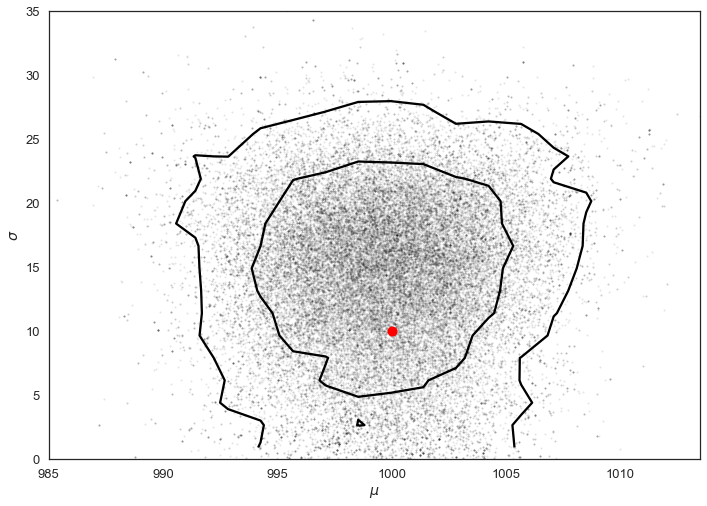

In [17]:
from astroML.plotting import plot_mcmc
fig = plt.figure()
ax = plot_mcmc(sample.T, fig=fig, labels=[r'$\mu$', r'$\sigma$'], colors='k', )
ax[0].plot(sample[:, 0], sample[:, 1], '.k', alpha=0.1, ms=4)
ax[0].plot([mu_true], [sigma_true], 'o', color='red', ms=10);



Notice the asymmetry! The previous alluded to interaction between the two unknowns results in a non-elliptical posterior. An elliptical posterior could result in purely Gaussian projections on either of the two axes, but the present posterior clearly won't (especially obvious along the $\sigma$-axis).

As you can see, the true value for both ingredients of theta are not on the maximum of the posterior. There is no reason for it to be there, the inner solid curve shows the range whithin which the real values should lie at 95% confidence. Run the same code with a different random number seed and the posterior will look different.

In principle, the posterior is the end point with most meaning. It doesn't make a lot of sense to quote something like $\sigma = X \pm Y$, as the errors are asymmetric, and in general even of very irregular shape.

In the next exercise, you will play with this estimator, and introduce your own, non-flat priors!


--------------------------------------------------------------------------------------


# And now for something completely different - Nuisance parameters
## When bayesian and frequentist methods seem to disagree

Let's walk through an example that is very close to something Bayes himself once used. Imagine a billiard table. Someone rolls a ball until it stops. The imaginary line along the longest axis on the table through that ball determines two parts of the table: one with points for A(lice) and the other with points for B(ob):


<img src="figures/billiards.png" alt="Bayesian Billiards">


After that, more balls are rolled on the table. Every time the person whose imaginary part the ball ends on gets a point and the one who is at 6 points first wins.

In problems like these, the location of that first, table dividing ball can be a nuisance parameter if it is unkown in a given setting. The location in principle is not the parameter of interest, butit is important for the outcome of the analysis. Imagine a problem like this: in a particular game, after 8 balls Alice has 5 points and Bob has three. What is the probability that Bob wins after all?

In a naive (frequentist?) approach, you could say that the best guess for a ball to end on Bob's terrain is 3/8, so Bob's chance of still winning would be:

In [18]:
p_hat = 5. / 8.
freq_prob = (1 - p_hat) ** 3
print("Naive frequentist probability of Bob winning: {0:.3f}".format(freq_prob))
print('In terms of odds: {0:.0f} against 1'.format((1. - freq_prob) / freq_prob))


Naive frequentist probability of Bob winning: 0.053
In terms of odds: 18 against 1


Bayesians wouldn't be bayesians if they wouldn't immediately pull out bayes' theorem. Unfortunately the derivation of the bayesian result is somewhat complicated, involving beta-functions, due to a marginalization over the parameter $p$ that encapsulates the unknown location of the first ball. The full derivation can be found on a [the second part of the blog by VanderPlas](http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/).

In short, it goes as follows. Given that we do not know $p$ we will have to marginalize over all possible values of $p$, such that the probability of Bob winning given the data can be written as
$$
P(B~|~D) \equiv \int_{-\infty}^\infty P(B,p~|~D) {\mathrm d}p
$$
If you were to use Bayes' rule, and some manipulation in the link above, you arrive at a result that is given by
$$
P(B~|~D) = \frac{\int_0^1 (1 - p)^6 p^5 dp}{\int_0^1 (1 - p)^3 p^5 dp}
$$

I personally am not a huge fan of such integrals, but luckily they turn out to be pecial cases of the [Beta Function](http://en.wikipedia.org/wiki/Beta_function):
$$
\beta(n, m) = \int_0^1 (1 - p)^{n - 1} p^{m - 1}
$$
The Beta function can be further expressed in terms of gamma functions (i.e. factorials), but for simplicity we'll compute them directly using Scipy's beta function implementation:

In [19]:
from scipy.special import beta
bayes_prob = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)

print("P(B|D) = {0:.3f}".format(bayes_prob))
print("Bayesian odds against Bob winning: {0:.0f} to 1".format((1. - bayes_prob) / bayes_prob))

P(B|D) = 0.091
Bayesian odds against Bob winning: 10 to 1


That's not the same! The difference, as you might expect, is caused by the marginalization over the different values for p, the location of the first ball. The value for p is not equal to 5/8, but is a pdf, in which 5/8 is the maximum likelihood value. It is, nevertheless, quite skewed. On top of that, the propagation fo different values for p into chance of Bob still winning is non-linear, so for another not-very-improbable value of p the chance of Bob winning can become much bigger. This works in such a way that the marginalisation 
$$P (B | D) = \int P(B, p | D) \textrm{d}p$$
results in a much higher chance of Bob winning than that for taking p=5/8. That parameter p is called the nuisance parameter: it is important for the result, but not of actual interest.

A simple Monte Carlo simulation can show that the Bayesian result indeed is correct:

In [20]:
np.random.seed(0)

# 10k games with a random dividing point on the table, between 0 and 1
p = np.random.random(100000)

# Given the situation, 11 balls are sufficient and necessary
rolls = np.random.random((11, len(p)))

# Did either win yet?
Alice_count = np.cumsum(rolls < p, 0)
Bob_count = np.cumsum(rolls >= p, 0)

# Select games that fit the current situation
good_games = Bob_count[7] == 3
print("Number of suitable games: {0}".format(good_games.sum()))
Alice_count = Alice_count[:, good_games]
Bob_count = Bob_count[:, good_games]

# Which ones did Bob win?
bob_won = np.sum(Bob_count[10] == 6)
print("Number won by Bob: {0}".format(bob_won.sum()))

# So the probability is...
mc_prob = bob_won.sum() * 1. / good_games.sum()
print("Monte Carlo Probability of Bob winning: {0:.3f}".format(mc_prob))
print("MC Odds against Bob winning: {0:.0f} to 1".format((1. - mc_prob) / mc_prob))

Number of suitable games: 11068
Number won by Bob: 979
Monte Carlo Probability of Bob winning: 0.088
MC Odds against Bob winning: 10 to 1



This result is *not* meant to show you that frequentists methods are incorrect. In fact, also a frequentist could marginalze over values of p (although one might argue that the frequentist is then using methods that are basically bayesian). What it *does* mean to say is that, while a frequentist needs to both think of the necessary marginalization (rather than just using the maximum likelihood for p, as they would do for any other parameter) and resort to methods that go beyond the usual. The bayesian, on the other hand, will more naturally do the numerical integration over the nuisance parameter, and the method a bayesian uses is not any different from any other problem. In short: in bayesian analysis the treatment of nuisance parameters is more natural, and easier.

I must admit that I myself would probably shoot for the simple, numeric Monte Carlo simulation as above. I am a practical statistician and love the methods that Jake VanderPlas also advertises in his [talk about statistics for hackers](https://www.youtube.com/watch?v=Iq9DzN6mvYA).




## Example two: a linear fit with outliers

A second, perhaps slightly more fair comparison between bayesian and frequentist methods is a linear fit to data with outliers. We first construct a data set, with errors:

In [21]:
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

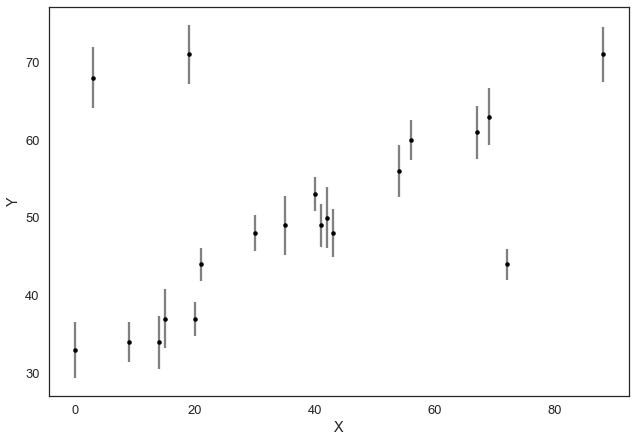

In [22]:
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.xlabel('X');plt.ylabel('Y');


Not by accident, the outliers at low X are too high, whereas the one at high X is too low, to make sure that conventional naive methods are likely to underestimate the slope of a function describing the non-outlier points.

Let's fit a simple linear model, with a slope and an intercept, taken together in parameter vector $\theta$:
$$
\hat{y}(x~|~\theta) = \theta_0 + \theta_1 x
$$
With this model, the Gaussian likelihood for all poits is given by:
$$
p(x_i,y_i,e_i~|~\theta) \propto \exp\left[-\frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2\right]
$$
As before, the likelihood is the product of all points, and the log of that looks like:
$$
\log \mathcal{L}(D~|~\theta) = \mathrm{const} - \sum_i \frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2
$$
Maximising this to find the best value for $\theta$ is the same as minimizing the sum, which is called the *loss*:
$$
\mathrm{loss} = \sum_i \frac{1}{2e_i^2}\left(y_i - \hat{y}(x_i~|~\theta)\right)^2
$$
This probably all looks familiar in terms of $\chi^2$ and the method is commonly know as minimizing $\chi^2$ and is a special, and very common, form of loss minimization. 

In the **bayesian** form this will result in the same expression for the posterior in case of a flat prior (which in this case is a doubtful choice). Frequentists can choose to do the minimization analytically, but for completeness we can solve it using optimization routines in scipy, as illustrated below.

There exist frequentist methods to deal with outliers as well. For example, one could use non-quadratic loss functions, like the Huber loss (see [VanderPlas' blog](http://jakevdp.github.io/blog/2014/06/06/frequentism-and-bayesianism-2-when-results-differ/) for details) or by iteratively refitting on the sample with outliers excluded.

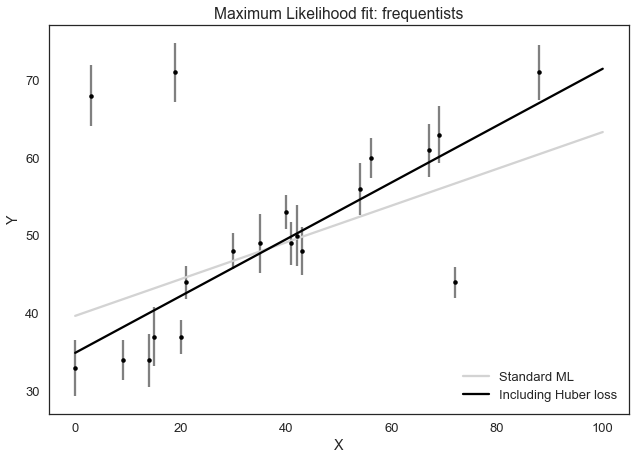

In [23]:
from scipy import optimize

def squared_loss(theta, x=x, y=y, e=e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)

xfit = np.linspace(0, 100)
# plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
# plt.plot(xfit, theta1[0] + theta1[1] * xfit, '-k')
# plt.title('Maximum Likelihood fit: Squared Loss');plt.xlabel('X');plt.ylabel('Y');

t = np.linspace(-20, 20)

def huber_loss(t, c=3):
    return ((abs(t) < c) * 0.5 * t ** 2
            + (abs(t) >= c) * -c * (0.5 * c - abs(t)))



def total_huber_loss(theta, x=x, y=y, e=e, c=3):
    return huber_loss((y - theta[0] - theta[1] * x) / e, c).sum()

theta2 = optimize.fmin(total_huber_loss, [0, 0], disp=False)

plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray', label="Standard ML")
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='black', label="Including Huber loss")
plt.legend(loc='lower right')
plt.title('Maximum Likelihood fit: frequentists');plt.xlabel('X');plt.ylabel('Y');

## Bayesian objections

The quadratic loss function follows directly from a Gaussian likelihood, so why would you opt for another *arbitrary* loss function? And why this one? And what value for c should one pick and why? That a real-life data set contains outliers is something one often just has to live with and it would be good to use a stable method with a minimum number of arbitrary decisions.

## Introduce nuisance parameters!

One line of attack used by Bayesians is to fit a model that allows every point to be an outlier, by adding a term on top of the linear relation. There are several ways to do so anf the metod chosen here looks somewhat like a "signal with a background".

We write the model as follows.

$
\begin{array}{ll}
p(\{x_i\}, \{y_i\},\{e_i\}~|~\theta,\{g_i\},\sigma,\sigma_b) = & \frac{g_i}{\sqrt{2\pi e_i^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2e_i^2}\right] \\
&+ \frac{1 - g_i}{\sqrt{2\pi \sigma_B^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_B^2}\right]
\end{array}
$

The idea is to introduce weights: $\{g_i\}$. When this weight is zero, you are dealing with a noise term with a high standard deviation $\sigma_B$ (e.g. 50, or some arbitrary high number, or something drawn from a very wide distribution, or you name it, as long as there is the freedom to basically get you to any value for Y, independent of X). This  "nuisance parameter", $\{g_i\}$, is a vector with a value for every data point. What we do, is changing our model from the two-dimensional problem of just fitting an intercept and slope, into a twentytwo-dimensional problem with the same slope and intercept and a "noise wight" for all data points.


In [24]:
# theta will be an array of length 2 + N, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope,
# and theta[2 + i] is the weight g_i

def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

In [25]:
# Note that this step will take a few minutes to run!

ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(42)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

/home/marcel/anaconda3/envs/workshop/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log
/home/marcel/anaconda3/envs/workshop/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


The markov chains (or rather: the part of the markov chain after burn in) samples the posterior pdf. All of it. Marginalisation of a parameter is not much else than ignoring that parameter when looking at the posterior (given that the posterior space for that parameter is well sampled)! So, here we want to marginalise over all 20 noise weight factors and just obtain the posterior in the slope and intercept.

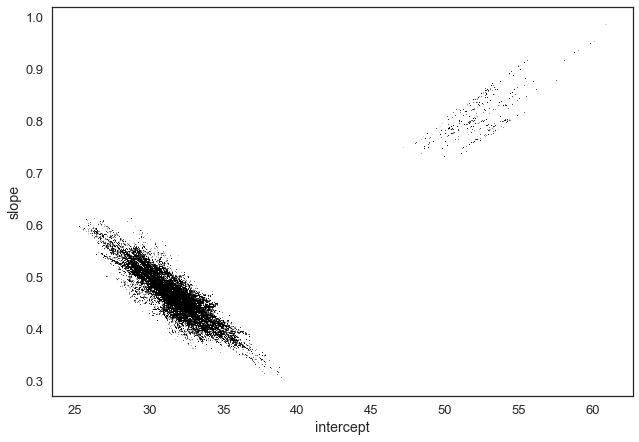

In [26]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

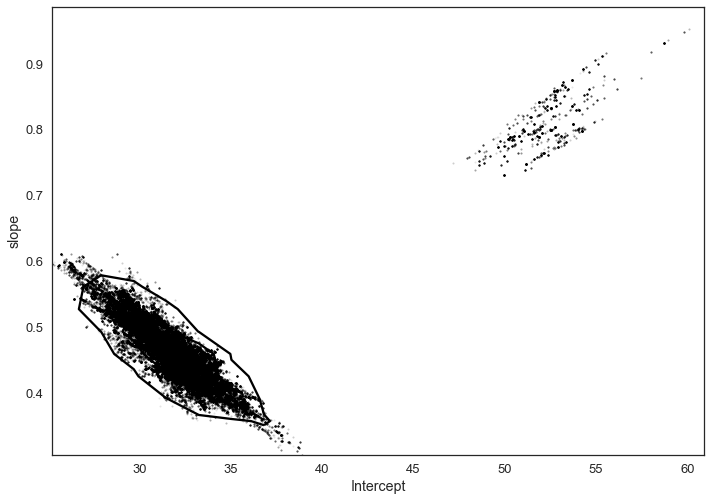

In [27]:
# Or with astroML to easily overplot the contours:
fig = plt.figure()
ax = plot_mcmc(sample[:,:2].T, fig=fig, labels=[r'Intercept', r'slope'], colors='k')
ax[0].plot(sample[:, 0], sample[:, 1], '.k', alpha=0.1, ms=4);
# ax[0].plot([mu_true], [sigma_true], 'o', color='red', ms=10);

There is an exercise to identify what's up with those points in the upper right part of the plot.

--------------------------------------------------------------------------------------


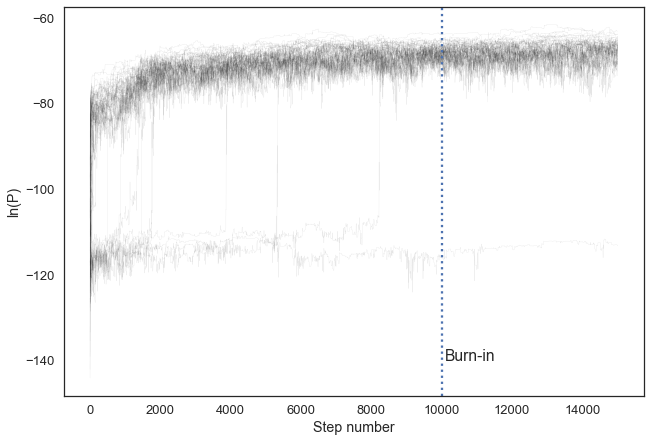

In [28]:
# Let's have a look at all the walkers and a choice of the burn in
for i in range(len(sampler.lnprobability)):
    plt.plot(sampler.lnprobability[i,:], linewidth=0.3, color='k', alpha=0.1)
plt.ylabel('ln(P)')
plt.xlabel('Step number')
plt.axvline(nburn, linestyle='dotted')
plt.text(nburn*1.01, -140, "Burn-in");

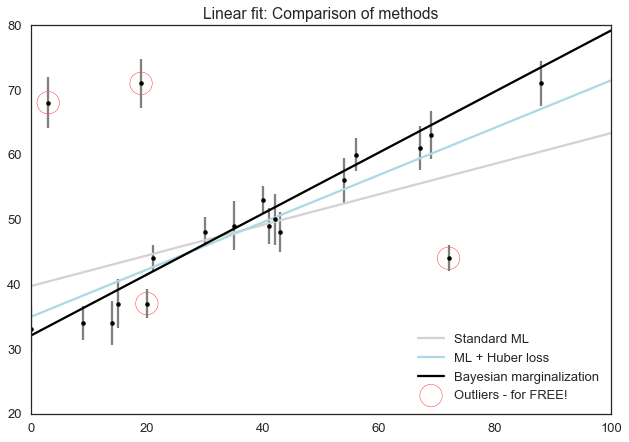

In [29]:
# And now the linear fit that results, see below for the outlier definition.

theta3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)

plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray', label="Standard ML")
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightblue', label="ML + Huber loss")
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black', label="Bayesian marginalization")
plt.scatter(x[outliers], y[outliers], edgecolor='red', facecolor='none', s=500, label="Outliers - for FREE!")
plt.xlim([0,100])
plt.ylim([20,80])
plt.legend(loc="lower right")
plt.title('Linear fit: Comparison of methods');

g1 mean: 0.55
g2 mean: 0.34


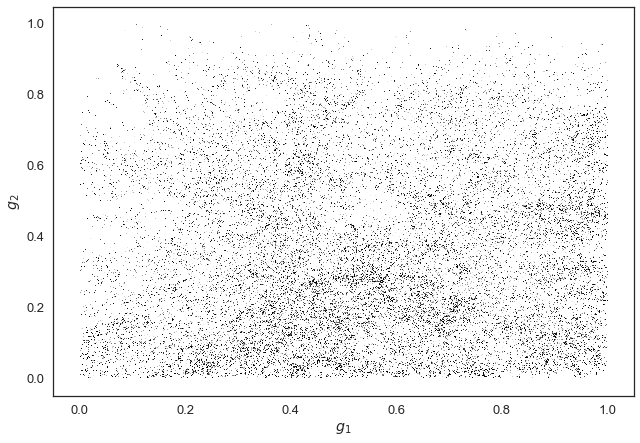

In [30]:
# What about the nuisance parameters?
plt.plot(sample[:, 2], sample[:, 3], ',k', alpha=0.1)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')

print("g1 mean: {0:.2f}".format(sample[:, 2].mean()))
print("g2 mean: {0:.2f}".format(sample[:, 3].mean()))

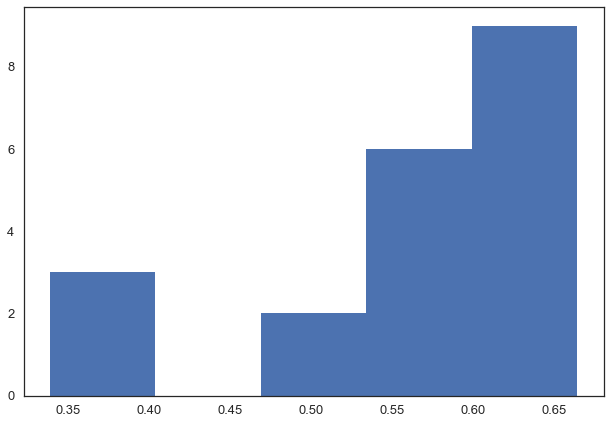

In [31]:
# Distribution of the means of all nuisance paramaters
plt.hist(g, bins=5);

# All a matter of interpretation...

We have seen frequentist and Bayesian methods in action side by side. It is now time to get back to that difference in interpretation between the two. Roughly:
- Frequentists say: If you repeat the experiment many times, then the real value of $\theta$ will fall within the confidence interval in 95% of the trials.
- Bayesians say: Given the data, there is a 95% probability that the real value of $\theta$ falls within the credible region.

So the basic difference is that frequentists see the value of $\theta$ as a given, while the data is a random variable. Bayesians, on the other hadn tae the data as given and regard the model parameters as random variables. After all: in general, the experiment won't be repeated many times...

So is that any important? Yes! As it turns out, many scientists answer bayesian questions with frequentist methods and that is just fundamentally wrong. Let's look at an example again.

## Jaynes' truncated exponential

Jaynes' truncated exponential is a concept that comes from technology and it is often used for failure of a device, after a chemical prohibitor runs out. The model for the time of device failure is given by 

$$
p(x~|~\theta) = \left\{
\begin{array}{lll}
\exp(\theta - x) &,& x > \theta\\
0                &,& x < \theta
\end{array}
\right\}
$$

So for $\theta=5$, that looks like:

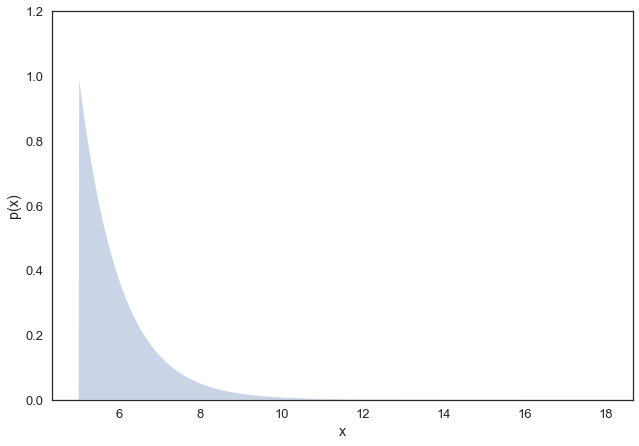

In [32]:
def p(x, theta):
    return (x > theta) * np.exp(theta - x)

x = np.linspace(5, 18, 1000)
plt.fill(x, p(x, 5), alpha=0.3)
plt.ylim(0, 1.2)
plt.xlabel('x')
plt.ylabel('p(x)');

Now assume that we have data of failure moments of devices given by $D=\{10, 12, 15\}$ and the question would be what the value of $\theta$ might be. Common sense will tell you that $\theta<10$, but probably also that $\theta>5$ or there would be more data close to 5. So what is it?

The details are, as you may have expected by now on a [blog by Jake VanderPlas](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/). In the interest of time we will not go into the nitty-gritty, but the result is outlined here.

Because of the low number of measurements, namely 3, the commonly employed "normal approximation", that is worked out in the given link, breaks down. This normal approximation happens to give nonsense results that have our intuitive answer outside the 95% confidence interval, which is [10.2 - 12.5].

For small $N$, the normal approximation will not apply, and we must instead compute the confidence integral from the actual sampling distribution, which is the distribution of the mean of $N$ variables each distributed according to $p(\theta)$. The sum of random variables is distributed according to the convolution of the distributions for individual variables, so we can exploit the [convolution theorem](http://en.wikipedia.org/wiki/Convolution_theorem) and use the method of [characteristic functions](http://en.wikipedia.org/wiki/Characteristic_function_%28probability_theory%29) to find the following sampling distribution for the sum of $N$ variables distributed according to our particular $p(x~|~\theta)$:

$$
f(\theta~|~D) \propto
\left\{
\begin{array}{lll}
z^{N - 1}\exp(-z) &,& z > 0\\
0 &,& z < 0
\end{array}
\right\}
;~ z = N(\hat{\theta} + 1 - \theta)
$$


To compute the 95% confidence interval, we can start by computing the cumulative distribution: we integrate $f(\theta~|~D)$ from $0$ to $\theta$ (note that we are not actually integrating over the *parameter* $\theta$, but over the *estimate* of $\theta$. Frequentists cannot integrate over parameters).
This integral is relatively painless if we make use of the expression for the [incomplete gamma function](http://en.wikipedia.org/wiki/Incomplete_gamma_function):

$$
\Gamma(a, x) = \int_x^\infty t^{a - 1}e^{-t} dt
$$

which looks strikingly similar to our $f(\theta)$.

Using this to perform the integral, we find that the cumulative distribution is given by

$$
F(\theta~|~D) = \frac{1}{\Gamma(N)}\left[ \Gamma\left(N, \max[0, N(\hat{\theta} + 1 - \theta)]\right) - \Gamma\left(N,~N(\hat{\theta} + 1)\right)\right]
$$

The 95% confidence interval $(\theta_1, \theta_2)$ satisfies the following equation:

$$
F(\theta_2~|~D) - F(\theta_1~|~D) = 0.95
$$

and the probability density is equal at either side of the interval:

$$
f(\theta_2~|~D) = f(\theta_1~|~D)
$$

Solving this system of two nonlinear equations will give us the desired confidence interval. Let's compute this numerically:

In [33]:
from scipy.special import gammaincc, erfinv
from scipy import optimize

# This approximate CI is the result of the much simpler normal approximation, 
# it serves as a simple helper function here, for the optimization down below.
def approx_CI(D, sig=0.95):
    """Approximate truncated exponential confidence interval"""
    # use erfinv to convert percentage to number of sigma
    Nsigma = np.sqrt(2) * erfinv(sig)
    D = np.asarray(D)
    N = D.size
    theta_hat = np.mean(D) - 1
    return [theta_hat - Nsigma / np.sqrt(N),
            theta_hat + Nsigma / np.sqrt(N)]

def exact_CI(D, frac=0.95):
    """Exact truncated exponential confidence interval"""
    D = np.asarray(D)
    N = D.size
    theta_hat = np.mean(D) - 1

    def f(theta, D):
        z = theta_hat + 1 - theta
        return (z > 0) * z ** (N - 1) * np.exp(-N * z)

    def F(theta, D):
        return gammaincc(N, np.maximum(0, N * (theta_hat + 1 - theta))) - gammaincc(N, N * (theta_hat + 1))
    
    def eqns(CI, D):
        """Equations which should be equal to zero"""
        theta1, theta2 = CI
        return (F(theta2, D) - F(theta1, D) - frac,
                f(theta2, D) - f(theta1, D))
    
    guess = approx_CI(D, 0.68) # use 1-sigma interval as a guess
    result = optimize.root(eqns, guess, args=(D,))
    if not result.success:
        print("warning: CI result did not converge!")
    return result.x

In [34]:
D = [10, 12, 15]
print("CI: ({0:.1f}, {1:.1f})".format(*exact_CI(D)))
print("The approximate CI using the normal approximation would give: ({0:.1f}, {1:.1f})".format(*approx_CI(D)))

CI: (10.2, 12.2)
The approximate CI using the normal approximation would give: (10.2, 12.5)


The exact confidence interval is slightly different than the approximate one, but still reflects the same problem: **we know from common-sense reasoning that $\theta$ can't be greater than 10, yet the 95% confidence interval is entirely in this forbidden region**! The confidence interval seems to be giving us unreliable results.

## Let's have a look at a bayesian approach.

For the Bayesian solution, we start by writing Bayes' rule:

$$
p(\theta~|~D) = \frac{p(D~|~\theta)p(\theta)}{P(D)}
$$

Using a constant prior $p(\theta)$, and with the likelihood

$$
p(D~|~\theta) = \prod_{i=1}^N p(x~|~\theta)
$$

we find

$$
p(\theta~|~D) \propto \left\{
\begin{array}{lll}
N\exp\left[N(\theta - \min(D))\right] &,& \theta < \min(D)\\
0                &,& \theta > \min(D)
\end{array}
\right\}
$$

where $\min(D)$ is the smallest value in the data $D$, which enters because of the truncation of $p(x~|~\theta)$.
 Because $p(\theta~|~D)$ increases exponentially up to the cutoff, the shortest 95% credibility interval $(\theta_1, \theta_2)$ will be given by

$$
\theta_2 = \min(D)
$$

and $\theta_1$ given by the solution to the equation

$$
\int_{\theta_1}^{\theta_2} N\exp[N(\theta - \theta_2)]d\theta = f
$$

this can be solved analytically by evaluating the integral, which gives

$$
\theta_1 = \theta_2 + \frac{\log(1 - f)}{N}
$$

Let's write a function which computes this:

In [35]:
def bayes_CR(D, frac=0.95):
    """Bayesian Credibility Region"""
    D = np.asarray(D)
    N = float(D.size)
    theta2 = D.min()
    theta1 = theta2 + np.log(1. - frac) / N
    return theta1, theta2

print("Bayesian 95% CR = ({0:.1f}, {1:.1f})".format(*bayes_CR(D)))

Bayesian 95% CR = (9.0, 10.0)


The explanation of the difference in results has much to do with the difference in interpretation. The bayesian interpretation can be visualised like this:
<img src="figures/credibleregion.png" alt="Bayesian credible region">
Whereas the frequentist result describes the following situation:
<img src="figures/confidence.png" alt="Frequentist confidence intervals">

The example is deliberately taken to be extreme: the value of 15 for the third observation is incredibly unlikely. Still, the bayesian method gives a result that is reasonable, while the frequentist method does not, becuase you happen to be in that green deviating confidence interval (and perhaps intepreting that the bayesian way!).


# Some final notes and references

We have done everything today with emcee. Emcee works well and is easy to use, but certain choices are made for you (e.g. the only possible sampling mechanism is the affine invariant Metropolis-Hastings) and you have to define the functions that go in yourself, which may or may not be difficult.

A maybe more common package to use for Bayesian inference is PyMC, that recently came out with a completely reworked version, PyMC3 (the three here is really the third version of this package, it has nothing to do with Python 2 or 3). Here, a lot of priors are predefined and there is more freedom to set up your MCMC. This comes at a cost: it is slightly more difficult to use. Some documentation about PyMC3 and how to get started can be found at the [devs' pages](https://pymc-devs.github.io/pymc3/notebooks/getting_started.html)
The [paper](http://arxiv.org/abs/1411.5018) by Jake VanderPlas mentioned above also has the truncated exponential example that we discussed worked out in PyMC (version 2, though).

For people who work with R-minded colleagues and others, you may have heard of Stan. It's a stand-alone MCMC sampler with interfaces to many languages, like Python and R. The same VanderPlas paper also has an example worked out in PyStan, with the (in my humble opinion) rather large drawback that you can not use pure Python, but will have to write Stan-specific code.

## What we haven't discussed
The biggest caveat today is model selection. Whenever you have two different models for which the parameters can both be estimated using bayesian methods, you might want to ask the question which model describes your data best. Model selection is, also in the frequentist world, a beast. This is where the evidence (the term in Bayes' theorem that we largely ignored) comes in. Both the Trotta paper mentioned above, as well as [the last part in VanderPlas' blog series](http://jakevdp.github.io/blog/2015/08/07/frequentism-and-bayesianism-5-model-selection/) are about this topic. After this workshop you should have the necessary background to follow along with those two sources!

## MCMC Bayesian inference in astronomy

There are nowadays more and more papers coming out that use Bayesian inference and I do not see a need to list those here. There a few papers that review the methodology, which could be useful for a new user. 
- The emcee paper listed before: Foreman-Mackey et al. [ArXiV listing](https://arxiv.org/abs/1202.3665)
- A recent review by Roberto Trotta: ["Bayesian Methods in Cosmology"](https://arxiv.org/abs/1701.01467). This includes background material, material on different samplers and priors, and exercises with solutions!
- An upcoming ARAA review by Sanjib Sharma is already on ArXiV: [Markov Chain Monte Carlo Methods for Bayesian Data Analysis in Astronomy](https://arxiv.org/abs/1706.01629). It is technical and dense, but more complete where it comes to model selection and the description of sampling methods is more detailed. It ends with a few examples in astronomy and comes with tailor-made code in Python (but using a special, non-standard MCMC package).



# Always Experiment!
If you are to start incorporating Bayensian methods in your everyday work, make sure to always experiment (at the *very least* with different choices of priors, starting points for you walkers, the number of walkers, the burn-in points and all those other lovely facets of Bayesian parameter inference using MCMC.

May you need some help, don't hesitate to email me at mail@marcelhaas.com!